# Sthocastic Gradient Descent

[link](https://ut.philkr.net/deeplearning/deep_networks/stochastic_gradient_descent/)

In [34]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import imageio.v2 as imageio 
import numpy as np
from IPython.display import Video

In [35]:
f = lambda x: 1+2*x**2

N = 20
xs = 4*torch.rand(N)-2
ys = f(xs) + 0.5*torch.randn(N)

x = torch.linspace(-2,2,100,requires_grad=True)

torch.manual_seed(1)

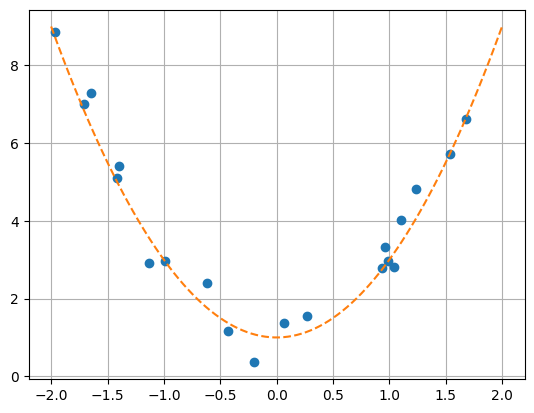

In [36]:
plt.plot(xs.detach().numpy(), ys.detach().numpy(), 'o')
plt.plot(x.detach().numpy(), f(x).detach().numpy(), '--')
plt.grid()
plt.show()

In [37]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(-2*torch.ones(1))

    def forward(self, x):
        return 1 + self.a * x**2
    
loss_fn = nn.MSELoss()  
lr = 0.01

## Batch Gradient Descent

In [38]:
model = Model()
opt = torch.optim.SGD([model.a], lr=lr)

model.train()
losses = []
for epoch in range(100):
    preds = model(xs)
    loss  = loss_fn(preds, ys)
    loss.backward()
    opt.step()
    opt.zero_grad()  

    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 52.54388427734375
Epoch 10, Loss: 14.579246520996094
Epoch 20, Loss: 4.1355881690979
Epoch 30, Loss: 1.2626512050628662
Epoch 40, Loss: 0.47233790159225464
Epoch 50, Loss: 0.2549315094947815
Epoch 60, Loss: 0.19512513279914856
Epoch 70, Loss: 0.17867311835289001
Epoch 80, Loss: 0.17414729297161102
Epoch 90, Loss: 0.17290231585502625


In [39]:
model = Model()
model.train()
for epoch in range(100):
    preds = model(xs)
    loss  = loss_fn(preds, ys)
    loss.backward()
    with torch.no_grad():
        model.a.add_(model.a.grad, alpha=-lr) # more efficient
        #model.a -= lr * model.a.grad
    model.a.grad.zero_()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 52.54388427734375
Epoch 10, Loss: 14.579246520996094
Epoch 20, Loss: 4.1355881690979
Epoch 30, Loss: 1.2626512050628662
Epoch 40, Loss: 0.47233790159225464
Epoch 50, Loss: 0.2549315094947815
Epoch 60, Loss: 0.19512513279914856
Epoch 70, Loss: 0.17867311835289001
Epoch 80, Loss: 0.17414729297161102
Epoch 90, Loss: 0.17290231585502625


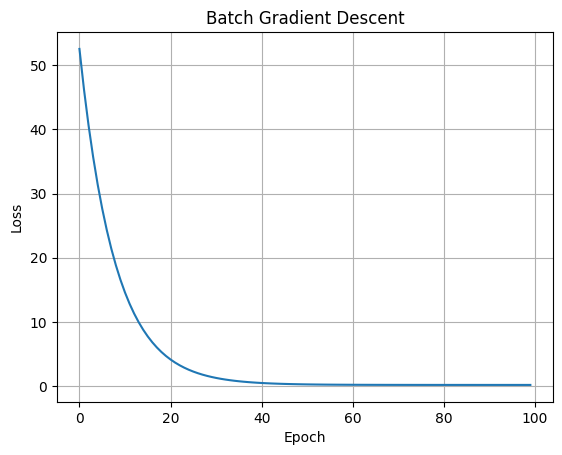

In [40]:
plt.plot(losses)
plt.title("Batch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Stochastic Gradient Descent

In [41]:
torch.manual_seed(0)
model = Model()
opt = torch.optim.SGD([model.a], lr=lr)

N = xs.shape[0]
model.train()
losses = []
for epoch in range(20):
    perm = torch.randperm(N)  # shuffle for stochasticity
    for i in perm:
        x = xs[i].unsqueeze(0)      # add batch dim if model expects (B, ...)
        y = ys[i].unsqueeze(0)
        opt.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        opt.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 30.191696166992188
Epoch 1, Loss: 0.6949478387832642
Epoch 2, Loss: 0.03901312127709389
Epoch 3, Loss: 0.1684316098690033
Epoch 4, Loss: 0.2411523461341858
Epoch 5, Loss: 0.22609491646289825
Epoch 6, Loss: 0.0025050523690879345
Epoch 7, Loss: 0.16263294219970703
Epoch 8, Loss: 0.008227295242249966
Epoch 9, Loss: 0.3925221264362335
Epoch 10, Loss: 0.16052092611789703
Epoch 11, Loss: 0.4241897761821747
Epoch 12, Loss: 0.13637571036815643
Epoch 13, Loss: 0.3573273718357086
Epoch 14, Loss: 0.007309149485081434
Epoch 15, Loss: 0.022478433325886726
Epoch 16, Loss: 0.15136843919754028
Epoch 17, Loss: 0.0016391819808632135
Epoch 18, Loss: 0.001449685194529593
Epoch 19, Loss: 0.09598027169704437


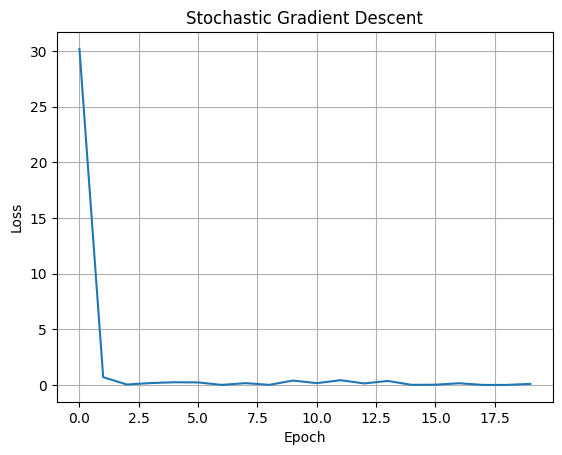

In [42]:
plt.plot(losses)
plt.title("Stochastic Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Parameter Space

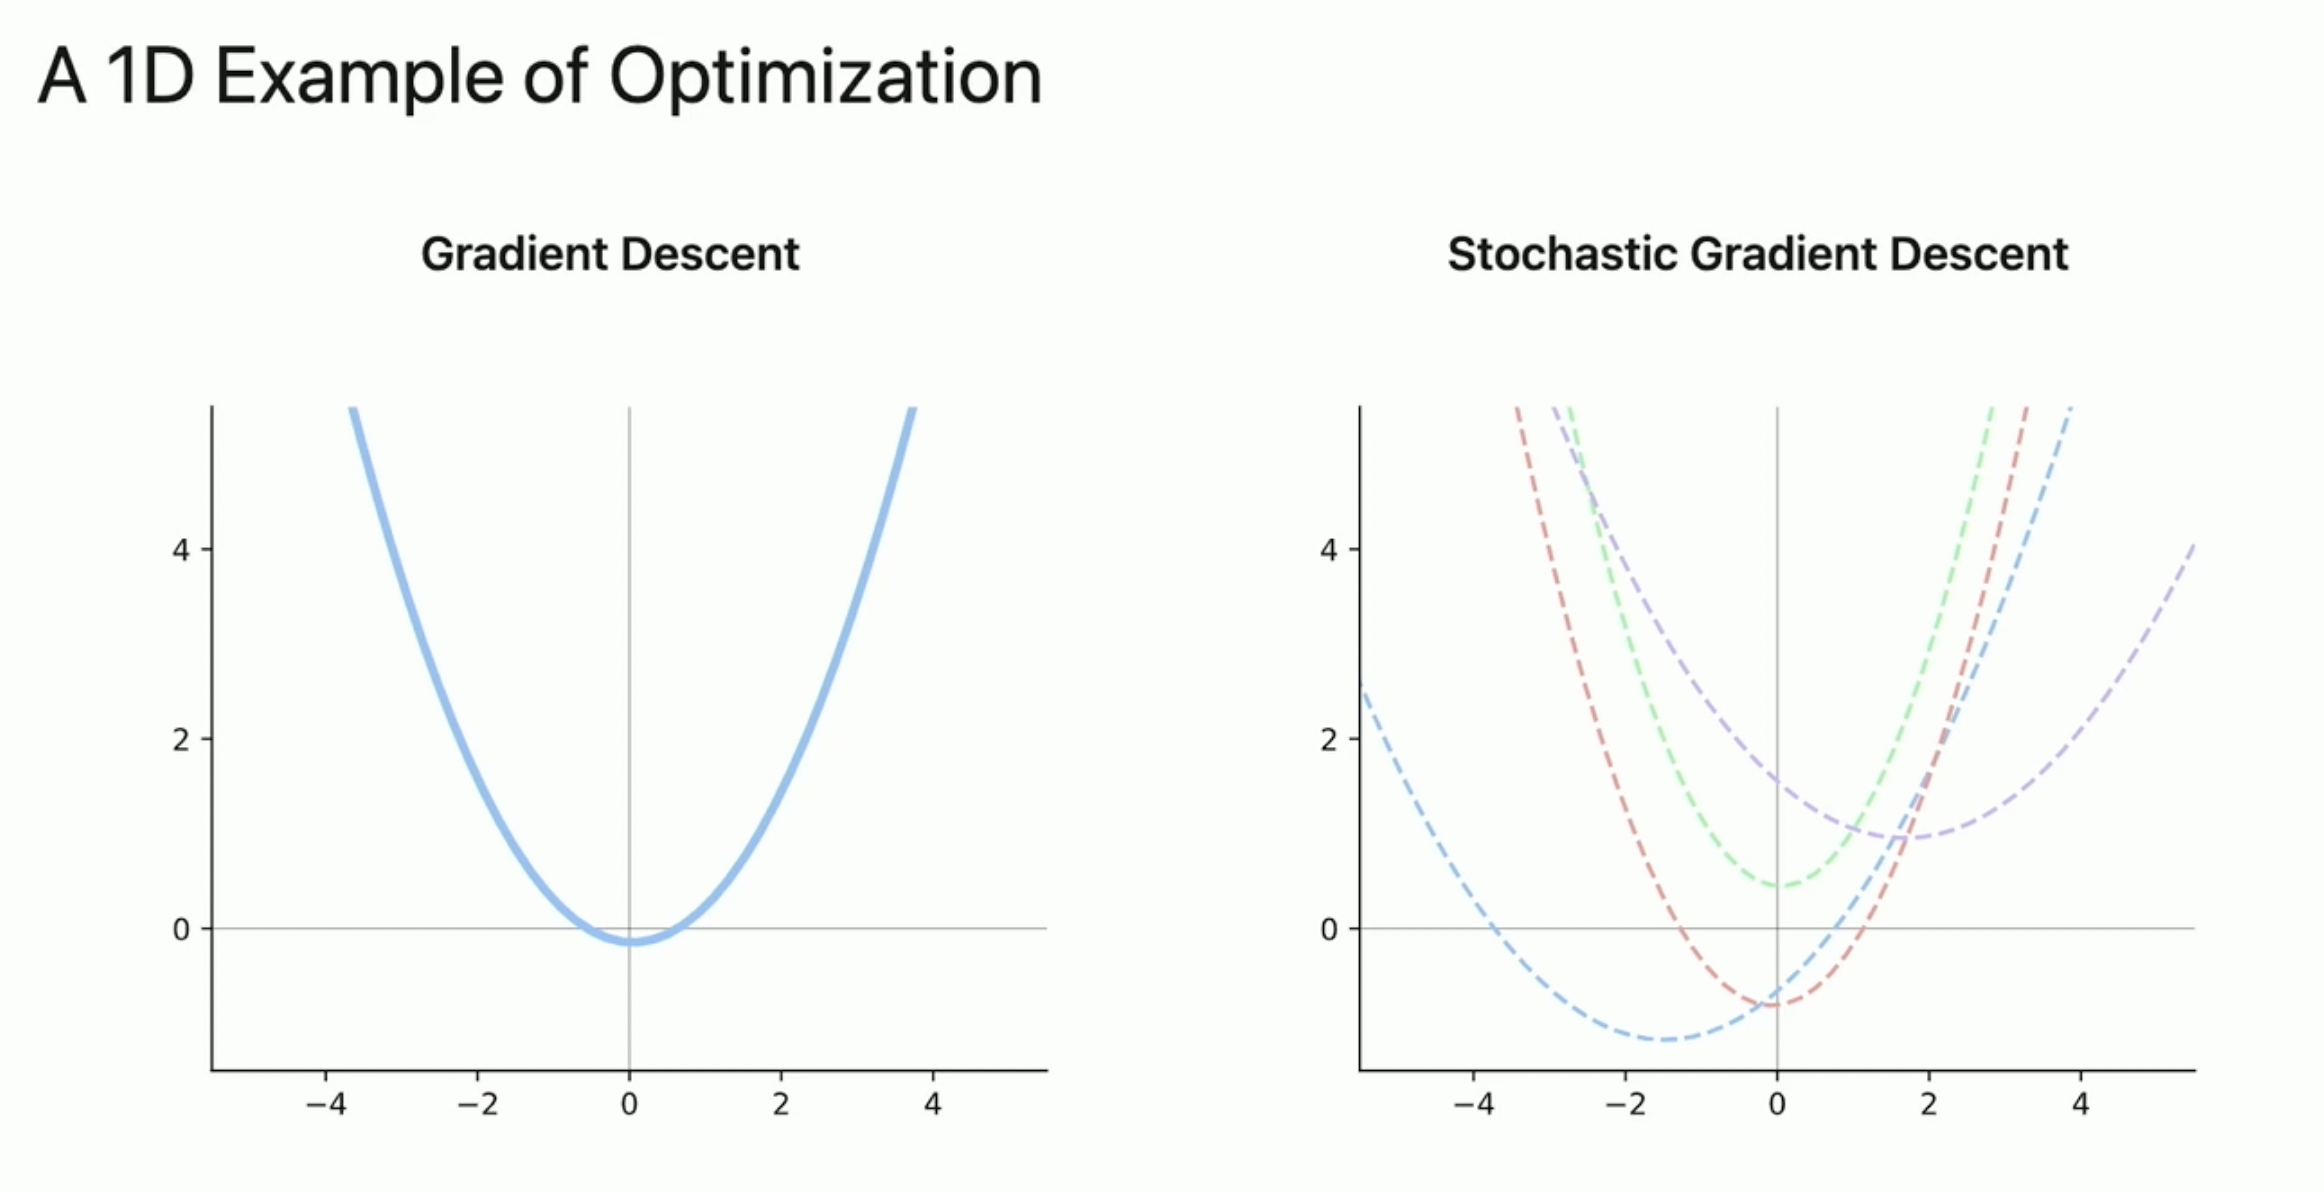

In [43]:
def param_space(a,modela,x,y):
    model_a = modela.detach().numpy()
    loss_a = (1+a*x**2-y*torch.ones_like(a))**2
    loss_modela= ((1+modela*x**2-y)**2).detach().numpy()
    fig, ax = plt.subplots()
    
    ax.scatter(model_a,loss_modela, color='red')
    ax.plot(a.detach().numpy(),loss_a.detach().numpy() )
    ax.set_ylim(0,10)
    ax.grid()
    fig.canvas.draw()
    frame_image = np.array(fig.canvas.buffer_rgba())[..., :3]  # (H,W,3)
    plt.ylim(0, 10)
    plt.close(fig)
    return frame_image

In [44]:
a = torch.linspace(-3,3,100)
model = Model()
opt = torch.optim.SGD([model.a], lr=lr)

N = xs.shape[0]
model.train()
frames = []
for epoch in range(5):
    perm = torch.randperm(N)  # shuffle for stochasticity
    for i in perm:
        x = xs[i].unsqueeze(0)      # add batch dim if model expects (B, ...)
        y = ys[i].unsqueeze(0)
        opt.zero_grad(set_to_none=True)  # zero BEFORE backward
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        frame_image=param_space(a,model.a,xs[i],ys[i])
        frames.append(frame_image)
        opt.step()

imageio.mimsave("3 - sgd.mp4", frames, fps=20) 

Video("3 - sgd.mp4", embed=True, html_attributes="controls autoplay loop")

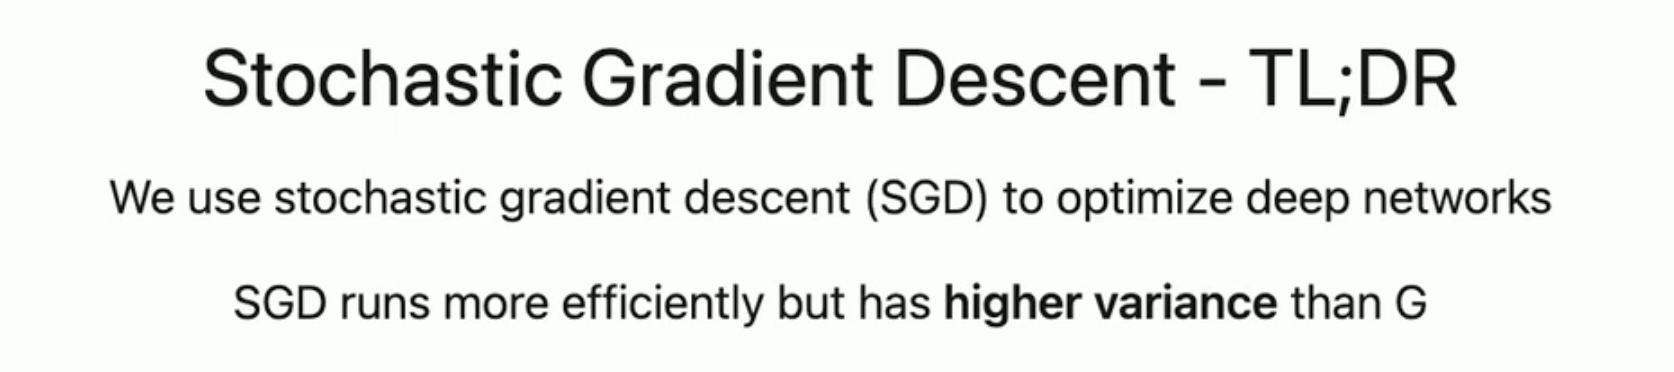